In [173]:
import numpy as np

In [174]:
import pandas as pd

In [175]:
import matplotlib as plt 

In [176]:
import seaborn as sns

In [177]:
from sklearn.linear_model import LinearRegression

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [180]:
from sklearn.linear_model import LogisticRegression

In [181]:
from sklearn.ensemble import RandomForestRegressor

In [182]:
from sklearn.neighbors import KNeighborsRegressor

In [183]:
# 2 charger les donnees
data = pd.read_csv('Data/Real-state.csv')

In [184]:
data.head(4)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8


# 3.Analyse es donnees

In [185]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [186]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [187]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

<Axes: >

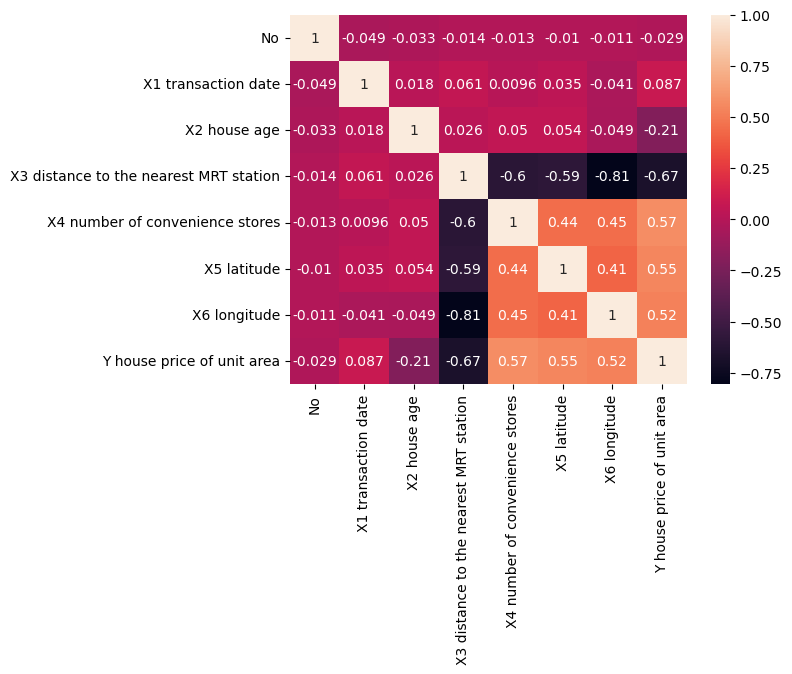

In [188]:
# Affichage e la matrice de correlations
sns.heatmap(data.corr(), annot=True)

In [189]:
data['X4 number of convenience stores'].unique()

array([10,  9,  5,  3,  7,  6,  1,  4,  2,  8,  0], dtype=int64)

In [190]:
data['X4 number of convenience stores'].value_counts()

X4 number of convenience stores
5     67
0     67
3     46
1     46
6     37
7     31
4     31
8     30
9     25
2     24
10    10
Name: count, dtype: int64

# 4.Division des donnees

In [191]:
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [192]:
pd.set_option('display.max_rows',None)

In [193]:
data.head(2)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2


In [194]:
X = data.drop(columns= 'Y house price of unit area', axis=1)
y = data['Y house price of unit area']

In [195]:
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [196]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [197]:
# separation des donnees : Train et Test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=0)

# 5.C0nstruction du modeles

# 5.1Lineair Regrassion : Regression Lineaire

In [198]:
1 # creation du modele
model_lr = LinearRegression()
# Entrainement du modele
model_lr.fit(X_train, y_train)
 # Faire des Predictions
model_lr.predict (X_test)
 # Evaluation du modele
print("MSE du LR:", mean_squared_error (y_test, model_lr.predict(X_test)))
print("R2 Score du LR:", r2_score(y_test, model_lr.predict(X_test)))

MSE du LR: 59.79820550973475
R2 Score du LR: 0.6557366417645122


# 5.2 Random Forest

In [199]:
1# Creation du Nodele
2 model_rf = RandomForestRegressor()
3 # Entrainement du modele
4 model_rf.fit(X_train, y_train)
5 # Faire des Predictions
6 model_rf.predict(X_test)
7 # Evaluation du modele
8 print ("MSE du RFI", mean_squared_error(y_test, model_rf.predict(X_test)))
9 print ("R2 Score du RF:", r2_score(y_test, model_rf.predict (X_test)))

SyntaxError: invalid syntax (1221231544.py, line 2)

In [ ]:
# 5.3